In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

%config InlineBackend.figure_format='svg'

import numpy as np
from matplotlib import pyplot as plt

from morphing_birds import Hawk3Dtest, HawkPlotterTest, HawkAnimatorTest, HawkDataTest, HawkPCATest






In [ ]:
hawk3d = Hawk3Dtest("../data/mean_hawk_shape.csv")
hawk3d.current_shape.shape


(1, 14, 3)

In [1]:
hawkplot = HawkPlotterTest(hawk3d)

hawkplot.plot()



NameError: name 'HawkPlotterTest' is not defined

In [ ]:
# Create an array of [100,4,3] to see if the animation works
keypoint_frames = hawk3d.markers

# Now repeat keypoint_frames 100 times
keypoint_frames = np.repeat(keypoint_frames, 5, axis=0)

# Then add a little noise to the keypoint_frames
keypoint_frames += np.random.randn(*keypoint_frames.shape)*0.02

print(keypoint_frames.shape)

# hawk_animator = HawkAnimatorTest(hawk3d, hawkplot)

# hawk_animator.HawkPlotter.interactive_plot(keypoint_frames[0])
# print(keypoint_frames[0].shape)
hawk3d.update_keypoints(keypoint_frames[0])
print(keypoint_frames[0])
print(hawk3d.right_markers)

# HawkPlotterTest(hawk3d).interactive_plot()

# HawkAnimate = HawkAnimatorTest(hawk3d, hawkplot)

# animation = HawkAnimate.animate(keypoint_frames)

# new_hawkplot = HawkPlotterTest(new_hawk3d)
# new_hawkplot.interactive_plot()

# display(animation)



In [ ]:
# stop the animation
animation.event_source.stop()

## Load DMD results


In [4]:
pwd

'/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/002_Projects/Hawkflight/morphing_birds/examples'

(50, 4, 3)
No axes given, creating new figure inside animate.
Fig ID: 11108402448 Ax ID: 11109253456


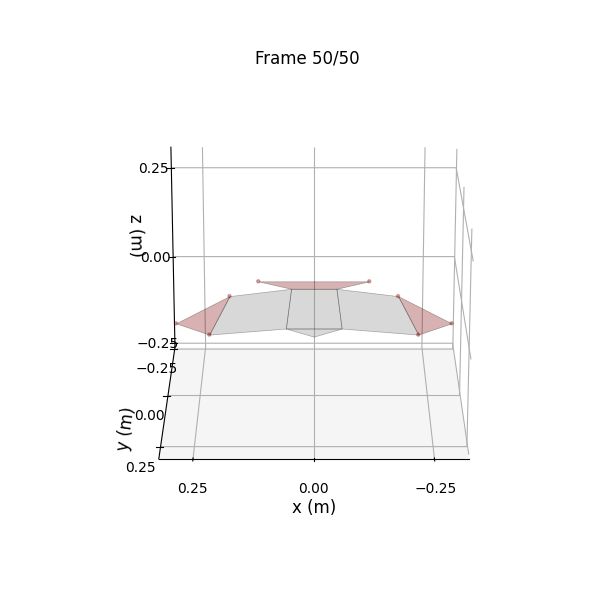

In [33]:
# animation.event_source.stop()
plt.close('all')

# dynamicsMode = np.load("../data/dynamics/DynamicsMode3.npy")



dynamicsMode = np.load("../data/dynamics/FlightDynamics.npy")


hawk3d = Hawk3Dtest("../data/mean_hawk_shape.csv")

hawkplot = HawkPlotterTest(hawk3d)

HawkAnimate = HawkAnimatorTest(hawk3d, hawkplot)

# Grab every other starting with the second
right_dynamicsMode = dynamicsMode[0:50,1::2,:]

# Reverse the x axis just in case
# right_dynamicsMode[:,:,0] = -right_dynamicsMode[:,:,0]

# Reverse the left side of the full results as this hasn't been done
# Reverse the x axis for the left side -- every other starting with the first
# dynamicsMode[:,0::2,0] = -dynamicsMode[:,0::2,0]

# Add some scaling
right_dynamicsMode *= 1.5

# right_dynamicsMode *= 80


print(right_dynamicsMode.shape)

# Add it to the average shape
average_shape = hawk3d.default_right_markers

# average_shape_full = hawk3d.default_markers

# Repeat it for the number of frames
average_shape = np.repeat(average_shape, right_dynamicsMode.shape[0], axis=0)

right_dynamicsMode = right_dynamicsMode + average_shape

animation = HawkAnimate.animate(right_dynamicsMode,az=90,colour="maroon")





plt.rcParams['animation.convert_path'] = '/opt/homebrew/bin/magick'
animation.save('../gif_results/combined.gif', writer='imagemagick', fps=5,dpi=200)






# animation = HawkAnimate.animate(dynamicsMode,az=40)



## Just plot the wingbeat from the data


In [26]:
plt.close('all')
single_wingbeat = np.load("../data/dynamics/wingbeat_measurement.npy")

single_wingbeat = single_wingbeat.T
print(single_wingbeat.shape)

# Grab every other starting with the second
right_single_wingbeat = single_wingbeat[:,1::2]


# Reshape to be [-1,4,3]
right_single_wingbeat = right_single_wingbeat.reshape(-1,4,3)
single_wingbeat = single_wingbeat.reshape(-1,8,3)
print(right_single_wingbeat.shape)

# Reverse the x axis for every other starting with the first
single_wingbeat[:,0::2,0] = -single_wingbeat[:,0::2,0]


# Add it to the average shape
average_shape = hawk3d.default_right_markers
average_shape_full = hawk3d.default_markers

# Repeat it for the number of frames
average_shape = np.repeat(average_shape, right_single_wingbeat.shape[0], axis=0)
average_shape_full = np.repeat(average_shape_full, single_wingbeat.shape[0], axis=0)

right_single_wingbeat = right_single_wingbeat + average_shape
single_wingbeat = single_wingbeat + average_shape_full

# Stack the array multiple times, such that it runs all the way through and then restarts
# I can't use np.repeat as that will just repeat the same frame multiple times
# Instead I need to stack the array multiple times


# animation = HawkAnimate.animate(right_single_wingbeat,az=40,colour='firebrick')
animation = HawkAnimate.animate(single_wingbeat,az=20,colour='firebrick')

plt.rcParams['animation.convert_path'] = '/opt/homebrew/bin/magick'
animation.save('../gif_results/actual_data_wingbeat_side.gif', writer='imagemagick', fps=10,dpi=200)






(40, 24)
(40, 4, 3)


NameError: name 'hawk3d' is not defined

In [ ]:
print(dynamicsMode)